In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# first we load our data and print out a few lines to see what our data looks like,
#then we perform operations to inspect data
#types and look for instances of missing or possibly errant data.import pandas as pd
df = pd.read_csv("forbes_2022_billionaires.csv")
df.head()

,rank,personName,age,finalWorth,year,month,category,source,country,state,...,organization,selfMade,gender,birthDate,title,philanthropyScore,residenceMsa,numberOfSiblings,bio,about
0,1,Elon Musk,50.0,219000.0,2022,4,Automotive,"Tesla, SpaceX",United States,Texas,...,Tesla,True,M,1971-06-28,CEO,1.0,NaN,NaN,Elon Musk is working to revolutionize transpor...,Musk was accepted to a graduate program at Sta...
1,2,Jeff Bezos,58.0,171000.0,2022,4,Technology,Amazon,United States,Washington,...,Amazon,True,M,1964-01-12,Entrepreneur,1.0,"Seattle-Tacoma-Bellevue, WA",NaN,Jeff Bezos founded e-commerce giant Amazon in ...,"Growing up, Jeff Bezos worked summers on his g..."
2,3,Bernard Arnault & family,73.0,158000.0,2022,4,Fashion & Retail,LVMH,France,NaN,...,LVMH Moët Hennessy Louis Vuitton,False,M,1949-03-05,Chairman and CEO,NaN,NaN,NaN,Bernard Arnault oversees the LVMH empire of so...,"Arnault apparently wooed his wife, Helene Merc..."
3,4,Bill Gates,66.0,129000.0,2022,4,Technology,Microsoft,United States,Washington,...,Bill & Melinda Gates Foundation,True,M,1955-10-28,Cofounder,4.0,"Seattle-Tacoma-Bellevue, WA",NaN,Bill Gates turned his fortune from software fi...,"When Gates was a kid, he spent so much time re..."
4,5,Warren Buffett,91.0,118000.0,2022,4,Finance & Investments,Berkshire Hathaway,United States,Nebraska,...,Berkshire Hathaway,True,M,1930-08-30,CEO,5.0,"Omaha, NE",NaN,"Known as the ""Oracle of Omaha,"" Warren Buffett...","Buffett still lives in the same Omaha, Nebrask..."


In [3]:
#Exploring the dataset
df.shape

(2668, 22)

In [4]:
df.dtypes

rank                      int64
personName               object
age                     float64
finalWorth              float64
year                      int64
month                     int64
category                 object
source                   object
country                  object
state                    object
city                     object
countryOfCitizenship     object
organization             object
selfMade                   bool
gender                   object
birthDate                object
title                    object
philanthropyScore       float64
residenceMsa             object
numberOfSiblings        float64
bio                      object
about                    object
dtype: object

#### Having looked at our dataset, i will not be proceeding wih some columns, as they will not be needed for my analysis. so i'll either drop them or select only the ones i want to work with.


In [5]:
#using the .loc function to keep the columns needed.
df = df.loc[:,["rank","personName","age","finalWorth","category","country","gender"]]
df.head()

,rank,personName,age,finalWorth,category,country,gender
0,1,Elon Musk,50.0,219000.0,Automotive,United States,M
1,2,Jeff Bezos,58.0,171000.0,Technology,United States,M
2,3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M
3,4,Bill Gates,66.0,129000.0,Technology,United States,M
4,5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M


In [6]:
#convert the rank column into an index column
df = df.set_index("rank")
df.head()

,personName,age,finalWorth,category,country,gender
rank,,,,,,
1,Elon Musk,50.0,219000.0,Automotive,United States,M
2,Jeff Bezos,58.0,171000.0,Technology,United States,M
3,Bernard Arnault & family,73.0,158000.0,Fashion & Retail,France,M
4,Bill Gates,66.0,129000.0,Technology,United States,M
5,Warren Buffett,91.0,118000.0,Finance & Investments,United States,M


In [7]:
#checking for missing values 
df.isnull().sum()

personName     0
age           86
finalWorth     0
category       0
country       13
gender        16
dtype: int64

From the process above, ypu can fnd that there are some missing data in the age, country, and gender columns. 
However, since there are not very many missing data in these columns,  we can have them removed.

In [8]:
#dropping columns missing values 
df.dropna(inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2568 entries, 1 to 2578
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   personName  2568 non-null   object 
 1   age         2568 non-null   float64
 2   finalWorth  2568 non-null   float64
 3   category    2568 non-null   object 
 4   country     2568 non-null   object 
 5   gender      2568 non-null   object 
dtypes: float64(2), object(4)
memory usage: 140.4+ KB


From here now after the cleaning, we can see that the dataset consists of 2568 rows and 6 columns and there is no missing data in the dataset.

# EDA 

First, let's look at the ratio of men to women in terms of gender check.

In [10]:
df["gender"].value_counts()

M    2282
F     286
Name: gender, dtype: int64

Having done that, it is evident that most billionaires are men by gender.. 

Let's look at the percentage of men and women using the normalize=True parameter.

In [11]:
df["gender"].value_counts(normalize=True)

M    0.888629
F    0.111371
Name: gender, dtype: float64

Approximately 89 percent of billionaires are men while 11 percent are women. 

In [29]:
#Let's look at the mean ages according to gender. To do this, I'm going to use the groupby method.
df_gender = df.groupby(["gender"])

In [13]:
#Let's calculate the mean ages with themean method.

df_gender["age"].mean()

gender
F    62.937063
M    64.409290
Name: age, dtype: float64

As can be seen, the average age of men is 64, and the average age of women is 63. Let's draw a bar plot for the male and female averages.

Text(0.5, 1.0, 'Average ages of men and women')

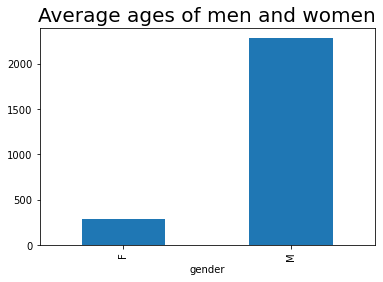

In [14]:
df_gender.size().plot(kind = "bar")
plt.title('Average ages of men and women', fontsize = 20)

### Let's take a look at the distribution of the age column.

Text(0.5, 1.0, 'The distribution of age')

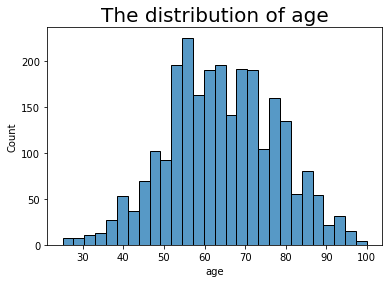

In [15]:
sns.histplot(df["age"])
plt.title('The distribution of age', fontsize = 20)

The age of the richest billionaire's are ranges between between 50 and 80.

### Let us further have a look at the top 10 richest people in the world 2022, using the barplot method in seaborn.

Text(0.5, 1.0, 'Top 10 richest')

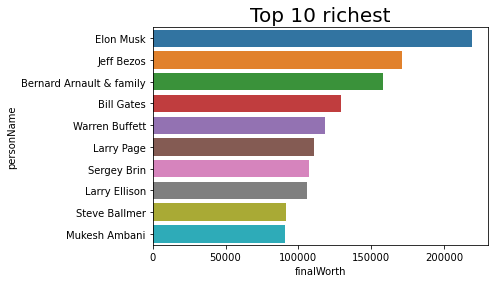

In [16]:
sns.barplot(y=df["personName"][:10], x = df["finalWorth"][:10])
plt.title('Top 10 richest', fontsize = 20)

From our analysis, it is deduced that the richest person in the world, Elon Musk, and followed by Jeff Bezos.

### Let's have a look at the categories of their sources

In [17]:
df["category"].unique()

array(['Automotive', 'Technology', 'Fashion & Retail',
       'Finance & Investments', 'Diversified', 'Media & Entertainment',
       'Telecom', 'Food & Beverage', 'Logistics', 'Real Estate',
       'Metals & Mining', 'Manufacturing', 'Gambling & Casinos',
       'Healthcare', 'Service', 'Energy', 'Construction & Engineering',
       'Sports'], dtype=object)

In [18]:
#Let me remove spaces from the columns and replace & with _ with the replace method.

df["category"]=df["category"].apply(lambda x:x.replace(" ","")).apply(lambda x:x.replace("&","_"))

In [19]:
#Let's look at unique categories with the unique method again.

df["category"].unique()

array(['Automotive', 'Technology', 'Fashion_Retail',
       'Finance_Investments', 'Diversified', 'Media_Entertainment',
       'Telecom', 'Food_Beverage', 'Logistics', 'RealEstate',
       'Metals_Mining', 'Manufacturing', 'Gambling_Casinos', 'Healthcare',
       'Service', 'Energy', 'Construction_Engineering', 'Sports'],
      dtype=object)

In [20]:
#Let's find the number of categories. To do this, I'm going to first use the groupby method and then the size method.

df_category = df.groupby("category").size()
df_category.head()

category
Automotive                   66
Construction_Engineering     45
Diversified                 174
Energy                       93
Fashion_Retail              238
dtype: int64

In [21]:
#Let me convert this data into a dataframe.

df_category = df_category.to_frame()
df_category.head()

,0
category,
Automotive,66
Construction_Engineering,45
Diversified,174
Energy,93
Fashion_Retail,238


In [22]:
#Let's name the first column with the rename method and sort the values by the number of categories with the sort_values method.

df_category=df_category.rename(columns = {0:"Count"}).sort_values(by = "Count", ascending=False)
df_category.head()

,Count
category,
Finance_Investments,381
Technology,332
Manufacturing,319
Fashion_Retail,238
Healthcare,209


Text(0.5, 1.0, 'Top 10 categories')

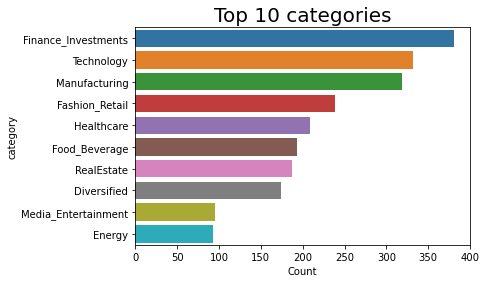

In [23]:
#Let's draw a bar plot of the first ten columns.

sns.barplot(df_category["Count"][:10], df_category.index[:10])
plt.title('Top 10 categories', fontsize = 20)

Following this analysis, we can see that "finance investments" is the category with the most billioneires. Right after this is, is being followed by technology, etc.

### Let's take a look at countries with the most billionaries.


In [24]:
# First, before we get that, let's quickly get the count number of unique countries in our dataset, using the len method.
len(df["country"].unique())

73

In [25]:
#There are 73 countries in the list. To draw a bar plot of the first ten countries that have the most billionaires, let's group the dataset according to the country column with the groupby method.

df_country = df.groupby("country")

In [26]:
#Let's calculate the number of billionaires by country with the size method, and then sort the countries with the most billionaires with sort_values and transform this data into a dataframe with the DataFrame method.

df_country_count = pd.DataFrame(
    df_country.size().sort_values(ascending=False), columns=["Count"])
df_country_count.head()

,Count
country,
United States,742
China,546
India,154
Germany,94
United Kingdom,81


Text(0.5, 1.0, 'Top 10 countries')

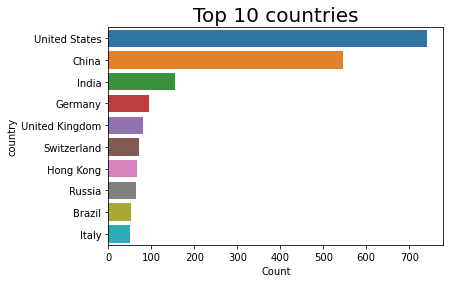

In [27]:
#Now let's draw a bar plot for the first ten countries.

sns.barplot(df_country_count["Count"][:10], df_country_count.index[:10])
plt.title('Top 10 countries', fontsize = 20)

The country with the most billionaires is the United States, followed by China, etc.

Text(0.5, 1.0, 'The relationship between money and age')

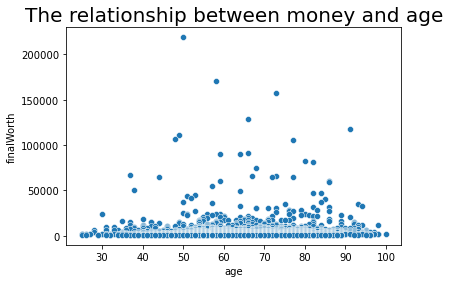

In [28]:
#Let's look at the relationship between money and age with scatterplot method.

sns.scatterplot(df["age"], df["finalWorth"])
plt.title('The relationship between money and age', fontsize = 20)

Finaly, as we can see, there is no relationship whatsoever between age and money.